### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [413]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [414]:
data = pd.read_csv('data/coupons.csv')

In [415]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [416]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [417]:
# value counts for car
data['car'].value_counts()

data['time'].value_counts()

data['temperature'].value_counts()

temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [418]:
# Drop car column; 99% of values are missing
data_ver2 = data.drop('car', axis=1)
data_ver2.columns

# Drop rows with missing values
data_ver3 = data_ver2.dropna()

# rename passanger column; to correct misspelling
data_ver3 = data_ver3.rename(columns={'passanger': 'passenger'})

data_ver3.head()


,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0


4. What proportion of the total observations chose to accept the coupon?



In [419]:
# Based on dataframe with missing values dropped
# Count of Y = 1 (number of people who accepted the coupon)
count_Y1 = data_ver3['Y'].value_counts()[1]

# Count of all values in column Y
total_count_Y = data_ver3['Y'].count()

# Proportion of Y = 1 in total Y 
Y1_proportion_of_Y = (count_Y1 / total_count_Y)

print(f"Proportion of observations that accepted coupon: {Y1_proportion_of_Y}")

Proportion of observations that accepted coupon: 0.5693352098683666


5. Use a bar plot to visualize the `coupon` column.

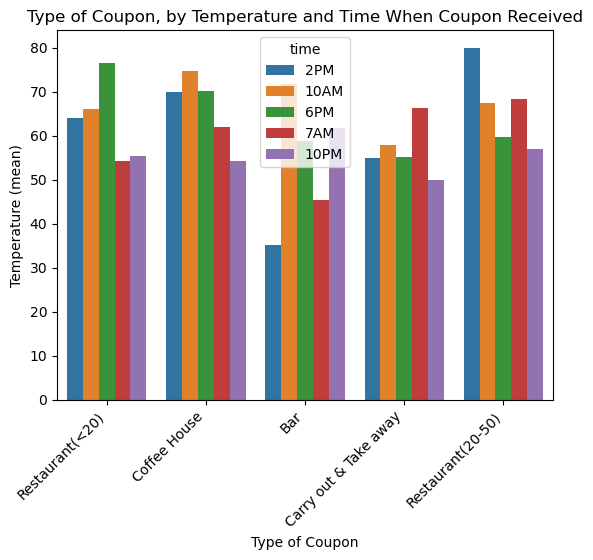

In [420]:
barplot_coupon = sns.barplot(data_ver3, x = 'coupon', y = 'temperature', hue = 'time', errorbar = None)
barplot_coupon.set_xlabel('Type of Coupon')
barplot_coupon.set_ylabel("Temperature (mean)")
plt.xticks(rotation=45, ha='right')
barplot_coupon.set_title("Type of Coupon, by Temperature and Time When Coupon Received")
plt.savefig("images/barplot_coupon", bbox_inches='tight', dpi=300)
plt.show()

6. Use a histogram to visualize the temperature column.

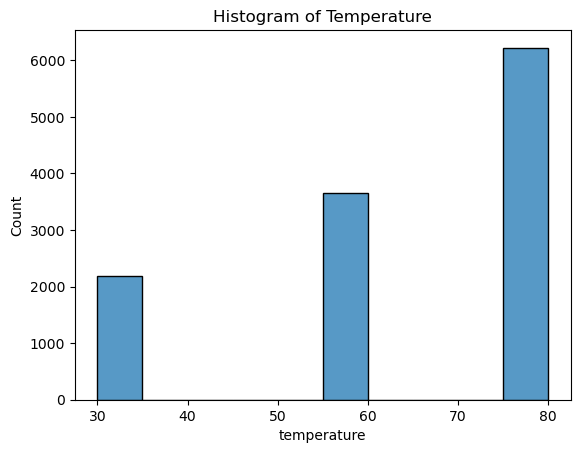

In [421]:
histogram_temperature = sns.histplot(data_ver3, x = 'temperature', binwidth = 5)
histogram_temperature.set_title('Histogram of Temperature')
plt.savefig("images/histogram_temperature", bbox_inches='tight', dpi=300)
plt.show()

In [422]:
data_ver3['coupon'].value_counts()

coupon
Coffee House             3816
Restaurant(<20)          2653
Carry out & Take away    2280
Bar                      1913
Restaurant(20-50)        1417
Name: count, dtype: int64

In [423]:
data_ver3['maritalStatus'].value_counts()

maritalStatus
Married partner      4831
Single               4588
Unmarried partner    2048
Divorced              504
Widowed               108
Name: count, dtype: int64

In [424]:
data_ver3['occupation'].value_counts()

occupation
Unemployed                                   1814
Student                                      1497
Computer & Mathematical                      1368
Sales & Related                              1072
Education&Training&Library                    855
Management                                    772
Office & Administrative Support               617
Arts Design Entertainment Sports & Media      564
Business & Financial                          516
Retired                                       473
Food Preparation & Serving Related            276
Healthcare Support                            242
Healthcare Practitioners & Technical          222
Legal                                         219
Community & Social Services                   219
Transportation & Material Moving              218
Protective Service                            175
Architecture & Engineering                    175
Life Physical Social Science                  170
Construction & Extraction              

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [425]:
data_ver3_coupon_only = data_ver3[data_ver3['coupon'] == 'Bar']
data_ver3_coupon_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1913 entries, 24 to 12682
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1913 non-null   object
 1   passenger             1913 non-null   object
 2   weather               1913 non-null   object
 3   temperature           1913 non-null   int64 
 4   time                  1913 non-null   object
 5   coupon                1913 non-null   object
 6   expiration            1913 non-null   object
 7   gender                1913 non-null   object
 8   age                   1913 non-null   object
 9   maritalStatus         1913 non-null   object
 10  has_children          1913 non-null   int64 
 11  education             1913 non-null   object
 12  occupation            1913 non-null   object
 13  income                1913 non-null   object
 14  Bar                   1913 non-null   object
 15  CoffeeHouse           1913 non-null   obj

2. What proportion of bar coupons were accepted?


In [426]:
# Count of Y = 1 (number of people who accepted the bar coupon)
count_Y1_bar = data_ver3_coupon_only['Y'].value_counts()[1]

# Count of all values in column Y
total_count_Y_bar = data_ver3_coupon_only['Y'].count()

# Proportion of Y = 1 in total Y 
Y1_proportion_of_Y_bar = (count_Y1_bar / total_count_Y_bar)

print(f"Proportion of bar coupons accepted: {Y1_proportion_of_Y_bar}")

Proportion of bar coupons accepted: 0.41191845269210664


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [427]:
bar3orless_list = ['never','less1', '1~3']
data_ver3_coupon_only_bar3orless = data_ver3_coupon_only[data_ver3_coupon_only['Bar'].isin(bar3orless_list)]
data_ver3_coupon_only_bar3orless['Bar'].value_counts()

count_Y1_bar3orless = data_ver3_coupon_only_bar3orless['Y'].value_counts()[1]
total_count_Y_bar3orless = data_ver3_coupon_only_bar3orless['Y'].count()
Y1_proportion_of_Y_bar3orless = (count_Y1_bar3orless / total_count_Y_bar3orless)
print(f"Proportion of bar coupons accepted for people who went to a bar 3 or fewer times a month: {Y1_proportion_of_Y_bar3orless}")


Proportion of bar coupons accepted for people who went to a bar 3 or fewer times a month: 0.37267441860465117


In [428]:
bar3orless_list = ['never','less1', '1~3']
data_ver3_coupon_only_bar3orless = data_ver3_coupon_only[data_ver3_coupon_only['Bar'].isin(bar3orless_list)]
data_ver3_coupon_only_bar3orless['Bar'].value_counts()

count_Y1_bar3orless = data_ver3_coupon_only_bar3orless['Y'].value_counts()[1]
total_count_Y_bar3orless = data_ver3_coupon_only_bar3orless['Y'].count()
Y1_proportion_of_Y_bar3orless = (count_Y1_bar3orless / total_count_Y_bar3orless)
print(f"Proportion of bar coupons accepted for people who went to a bar 3 or fewer times a month: {Y1_proportion_of_Y_bar3orless}")


Proportion of bar coupons accepted for people who went to a bar 3 or fewer times a month: 0.37267441860465117


In [429]:
bar4ormore_list = ['4~8','gt8']
data_ver3_coupon_only_bar4ormore = data_ver3_coupon_only[data_ver3_coupon_only['Bar'].isin(bar4ormore_list)]
data_ver3_coupon_only_bar4ormore['Bar'].value_counts()

count_Y1_bar4ormore = data_ver3_coupon_only_bar4ormore['Y'].value_counts()[1]
total_count_Y_bar4ormore = data_ver3_coupon_only_bar4ormore['Y'].count()
Y1_proportion_of_Y_bar4ormore = (count_Y1_bar4ormore / total_count_Y_bar4ormore)
print(f"Proportion of bar coupons accepted for people who went to a bar 4 or more times a month: {Y1_proportion_of_Y_bar4ormore}")


Proportion of bar coupons accepted for people who went to a bar 4 or more times a month: 0.7616580310880829


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [430]:
barmorethan1_list = ['1~3', '4~8','gt8']
ageover25_list = ['26','31', '36', '41', '46', '50plus']
data_ver3_coupon_only_barmorethan1 = data_ver3_coupon_only[data_ver3_coupon_only['Bar'].isin(barmorethan1_list)]
data_ver3_coupon_only_barmorethan1_ageover25 = data_ver3_coupon_only_barmorethan1[data_ver3_coupon_only_barmorethan1['age'].isin(ageover25_list)]
# data_ver3_coupon_only_barmorethan1_ageover25.head()
data_ver3_coupon_only_barmorethan1_ageover25['Bar'].value_counts()

count_Y1_barmorethan1_ageover25 = data_ver3_coupon_only_barmorethan1_ageover25['Y'].value_counts()[1]
total_count_Y_barmorethan1_ageover25 = data_ver3_coupon_only_barmorethan1_ageover25['Y'].count()
Y1_proportion_of_Y_barmorethan1_ageover25 = (count_Y1_barmorethan1_ageover25 / total_count_Y_barmorethan1_ageover25)
print(f"Proportion of bar coupons accepted for people over age 25 who went to a bar more than once a month: {Y1_proportion_of_Y_barmorethan1_ageover25}")

Proportion of bar coupons accepted for people over age 25 who went to a bar more than once a month: 0.6898263027295285


In [431]:
barlessthan1_list = ['never', 'less1']
age25under_list = ['21','below21']
data_ver3_coupon_only_barlessthan1 = data_ver3_coupon_only[data_ver3_coupon_only['Bar'].isin(barlessthan1_list)]
data_ver3_coupon_only_barlessthan1_age25under = data_ver3_coupon_only_barlessthan1[data_ver3_coupon_only_barlessthan1['age'].isin(age25under_list)]
# data_ver3_coupon_only_barlessthan1_age25under.head()
data_ver3_coupon_only_barlessthan1_age25under['Bar'].value_counts()

count_Y1_barlessthan1_age25under = data_ver3_coupon_only_barlessthan1_age25under['Y'].value_counts()[1]
total_count_Y_barlessthan1_age25under = data_ver3_coupon_only_barlessthan1_age25under['Y'].count()
Y1_proportion_of_Y_barlessthan1_age25under = (count_Y1_barlessthan1_age25under / total_count_Y_barlessthan1_age25under)
print(f"Proportion of bar coupons accepted for people age 25 and under who went to a bar less than once a month: {Y1_proportion_of_Y_barlessthan1_age25under}")


Proportion of bar coupons accepted for people age 25 and under who went to a bar less than once a month: 0.3883495145631068


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [432]:
barmorethan1_list = ['1~3', '4~8','gt8']
passengernotkid_list = ['Alone', 'Friend(s)', 'Partner']

data_ver3_coupon_only_barmorethan1 = data_ver3_coupon_only[data_ver3_coupon_only['Bar'].isin(barmorethan1_list)]
data_ver3_coupon_only_barmorethan1_passengernotkid = data_ver3_coupon_only_barmorethan1[data_ver3_coupon_only_barmorethan1['passenger'].isin(passengernotkid_list)]

data_ver3_coupon_only_barmorethan1_passengernotkid.head()
# data_ver3_coupon_only_barmorethan1_passengernotkid['passenger'].value_counts()

count_Y1_barmorethan1_passengernotkid = data_ver3_coupon_only_barmorethan1_passengernotkid['Y'].value_counts()[1]
total_count_Y_barmorethan1_passengernotkid = data_ver3_coupon_only_barmorethan1_passengernotkid['Y'].count()
Y1_proportion_of_Y_barmorethan1_passengernotkid = (count_Y1_barmorethan1_passengernotkid / total_count_Y_barmorethan1_passengernotkid)
print(f"Proportion of bar coupons accepted for people who went to a bar more than once a month and had a passenger who was not a kid: {Y1_proportion_of_Y_barmorethan1_ageover25}")

Proportion of bar coupons accepted for people who went to a bar more than once a month and had a passenger who was not a kid: 0.6898263027295285


In [433]:
occupation_notfarmfishforest_list = ['Unemployed', 'Student', 'Computer & Mathematical', 'Sales & Related', 'Education&Training&Library', 'Management', 'Office & Administrative Support', 'Arts Design Entertainment Sports & Media', 'Business & Financial', 'Retired', 'Food Preparation & Serving Related', 'Healthcare Support', 'Healthcare Practitioners & Technical', 'Legal', 'Community & Social Services', 'Transportation & Material Moving', 'Protective Service', 'Architecture & Engineering', 'Life Physical Social Science', 'Construction & Extraction', 'Personal Care & Service', 'Installation Maintenance & Repair', 'Production Occupations', 'Building & Grounds Cleaning & Maintenance']

data_ver3_coupon_only_occupation_notfarmfishforest = data_ver3_coupon_only[data_ver3_coupon_only['occupation'].isin(occupation_notfarmfishforest_list)]

# data_ver3_coupon_only_occupation_notfarmfishforest.head()
data_ver3_coupon_only_occupation_notfarmfishforest['occupation'].value_counts()

count_Y1_occupation_notfarmfishforest = data_ver3_coupon_only_occupation_notfarmfishforest['Y'].value_counts()[1]
total_count_Y_occupation_notfarmfishforest = data_ver3_coupon_only_occupation_notfarmfishforest['Y'].count()
Y1_proportion_of_Y_occupation_notfarmfishforest = (count_Y1_occupation_notfarmfishforest / total_count_Y_occupation_notfarmfishforest)
print(f"Proportion of bar coupons accepted for people who do not work in farming, fishing or forestry: {Y1_proportion_of_Y_occupation_notfarmfishforest}")


Proportion of bar coupons accepted for people who do not work in farming, fishing or forestry: 0.4117647058823529


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [434]:
notwidowed_list = ['Married partner', 'Single', 'Unmarried partner', 'Divorced']

data_ver3_coupon_only_barmorethan1_notwidowed = data_ver3_coupon_only_barmorethan1[data_ver3_coupon_only_barmorethan1['maritalStatus'].isin(notwidowed_list)]

# data_ver3_coupon_only_barmorethan1_notwidowed.head()
data_ver3_coupon_only_barmorethan1_notwidowed['maritalStatus'].value_counts()

count_Y1_barmorethan1_notwidowed = data_ver3_coupon_only_barmorethan1_notwidowed['Y'].value_counts()[1]
total_count_Y_barmorethan1_notwidowed = data_ver3_coupon_only_barmorethan1_notwidowed['Y'].count()
Y1_proportion_of_Y_barmorethan1_notwidowed = (count_Y1_barmorethan1_notwidowed / total_count_Y_barmorethan1_notwidowed)
print(f"Proportion of bar coupons accepted by people who went to a bar more than once a month and were not widowed: {Y1_proportion_of_Y_barmorethan1_ageover25}")

Proportion of bar coupons accepted by people who went to a bar more than once a month and were not widowed: 0.6898263027295285


In [435]:
ageunder30_list = ['21', '26']

data_ver3_coupon_only_barmorethan1_ageunder30 = data_ver3_coupon_only_barmorethan1[data_ver3_coupon_only_barmorethan1['age'].isin(ageunder30_list)]

# data_ver3_coupon_only_barmorethan1_ageunder30.head()
data_ver3_coupon_only_barmorethan1_ageunder30['age'].value_counts()

count_Y1_barmorethan1_ageunder30 = data_ver3_coupon_only_barmorethan1_ageunder30['Y'].value_counts()[1]
total_count_Y_barmorethan1_ageunder30 = data_ver3_coupon_only_barmorethan1_ageunder30['Y'].count()
Y1_proportion_of_Y_barmorethan1_ageunder30 = (count_Y1_barmorethan1_ageunder30 / total_count_Y_barmorethan1_ageunder30)
print(f"Proportion of bar coupons accepted by people who went to a bar more than once a month and were less than 30: {Y1_proportion_of_Y_barmorethan1_ageover25}")

Proportion of bar coupons accepted by people who went to a bar more than once a month and were less than 30: 0.6898263027295285


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [436]:
print("The data indicate that bar coupon acceptance is most closely and positively associated with how often the driver went to a bar monthly.\n")

print('The influence of age on bar coupon acceptance is unclear.\n')

print('There is some indication that drivers with occupations in farming, fisheries and forestry may be more likely to accept a bar coupon than other occupations.')

The data indicate that bar coupon acceptance is most closely and positively associated with how often the driver went to a bar monthly.

The influence of age on bar coupon acceptance is unclear.

There is some indication that drivers with occupations in farming, fisheries and forestry may be more likely to accept a bar coupon than other occupations.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [437]:
### Analysis of drivers who received coupons for more expensive restaurants

# create dataframe where drivers only received coupons for more expensive restaurants
data_ver3_coupon_Restaurant2050 = data_ver3[data_ver3['coupon'] == 'Restaurant(20-50)']
data_ver3_coupon_only.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1913 entries, 24 to 12682
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1913 non-null   object
 1   passenger             1913 non-null   object
 2   weather               1913 non-null   object
 3   temperature           1913 non-null   int64 
 4   time                  1913 non-null   object
 5   coupon                1913 non-null   object
 6   expiration            1913 non-null   object
 7   gender                1913 non-null   object
 8   age                   1913 non-null   object
 9   maritalStatus         1913 non-null   object
 10  has_children          1913 non-null   int64 
 11  education             1913 non-null   object
 12  occupation            1913 non-null   object
 13  income                1913 non-null   object
 14  Bar                   1913 non-null   object
 15  CoffeeHouse           1913 non-null   obj

In [438]:
# Proportion of drivers who accepted coupon for more expensive restaurant

# Count of Y = 1 (number of people who accepted the more expensive resto coupon)
count_Y1_resto = data_ver3_coupon_Restaurant2050['Y'].value_counts()[1]

# Count of all values in column Y
total_count_Y_resto = data_ver3_coupon_Restaurant2050['Y'].count()

# Proportion of Y = 1 in total Y 
Y1_proportion_of_Y_resto = (count_Y1_resto / total_count_Y_resto)

print(f"Proportion of more expensive restaurant coupons accepted: {Y1_proportion_of_Y_resto}")

Proportion of more expensive restaurant coupons accepted: 0.44601270289343686


In [439]:
# create new column for time based on 24 hour time
data_ver3_coupon_Restaurant2050 = data_ver3_coupon_Restaurant2050.assign(time_24hour=lambda x: np.where(x['time'] == '6PM', '18', np.where(x['time'] == '7AM', '7', np.where(x['time'] == '10AM', '10', np.where(x['time'] == '10PM', '22', '14')))))

# change data type of time_24hour to int
data_ver3_coupon_Restaurant2050['time_24hour'] = data_ver3_coupon_Restaurant2050['time_24hour'].astype(int)
print(data_ver3_coupon_Restaurant2050.dtypes)

data_ver3_coupon_Restaurant2050.head()

destination             object
passenger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
time_24hour              int64
dtype: object


,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,time_24hour
36,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,21,Single,...,4~8,4~8,less1,1,1,0,0,1,0,18
40,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Male,21,Single,...,4~8,4~8,less1,1,1,0,0,1,0,7
58,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,46,Single,...,1~3,1~3,never,1,1,0,0,1,0,18
62,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Male,46,Single,...,1~3,1~3,never,1,1,0,0,1,0,7
80,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,46,Married partner,...,1~3,1~3,less1,1,1,0,0,1,0,18


In [440]:
# Analysis of drivers who accepted expensive resto coupon received 2 pm onward

data_ver3_coupon_Restaurant2050['time_24hour'].value_counts()

twoPMorlater_list = [14, 18, 22]
data_ver3_coupon_Restaurant2050_twoPMorlater = data_ver3_coupon_Restaurant2050[data_ver3_coupon_Restaurant2050['time_24hour'].isin(twoPMorlater_list)]
data_ver3_coupon_Restaurant2050_twoPMorlater['time_24hour'].value_counts()

count_Y1_twoPMorlater = data_ver3_coupon_Restaurant2050_twoPMorlater['Y'].value_counts()[1]
total_count_Y_twoPMorlater = data_ver3_coupon_Restaurant2050_twoPMorlater['Y'].count()
Y1_proportion_of_Y_twoPMorlater = (count_Y1_twoPMorlater / total_count_Y_twoPMorlater)
print(f"Proportion of expensive restaurant coupons accepted by people who received it after 2 pm : {Y1_proportion_of_Y_twoPMorlater}")


Proportion of expensive restaurant coupons accepted by people who received it after 2 pm : 0.44666666666666666


In [441]:
# Analysis of drivers who accepted expensive resto coupon received before 2 pm
# and had no passengers
# using a bit less cumbersome code that I should have used earlier

data_ver3_coupon_Restaurant2050_twoPMorlater_nopassenger = data_ver3_coupon_Restaurant2050.query('time_24hour > 10 and passenger == "Alone"')
# data_ver3_coupon_Restaurant2050_twoPMorlater_nopassenger.tail()

count_Y1_twoPMorlater_nopassenger = data_ver3_coupon_Restaurant2050_twoPMorlater_nopassenger['Y'].value_counts()[1]
total_count_Y_twoPMorlater_nopassenger = data_ver3_coupon_Restaurant2050_twoPMorlater_nopassenger['Y'].count()
Y1_proportion_of_Y_twoPMorlater_nopassenger = (count_Y1_twoPMorlater_nopassenger / total_count_Y_twoPMorlater_nopassenger)
print(f"Proportion of expensive restaurant coupons accepted by people who received it after 2 pm and had no passenger: {Y1_proportion_of_Y_twoPMorlater}")


Proportion of expensive restaurant coupons accepted by people who received it after 2 pm and had no passenger: 0.44666666666666666


In [442]:
# Analysis of drivers who accepted expensive resto coupon received before 2 pm
# and had no kids

data_ver3_coupon_Restaurant2050_twoPMorlater_nokids = data_ver3_coupon_Restaurant2050.query('time_24hour > 10 and has_children == 0')
# data_ver3_coupon_Restaurant2050_twoPMorlater_nopassenger.tail()

count_Y1_twoPMorlater_nokids = data_ver3_coupon_Restaurant2050_twoPMorlater_nokids['Y'].value_counts()[1]
total_count_Y_twoPMorlater_nokids = data_ver3_coupon_Restaurant2050_twoPMorlater_nokids['Y'].count()
Y1_proportion_of_Y_twoPMorlater_nokids = (count_Y1_twoPMorlater_nokids / total_count_Y_twoPMorlater_nokids)
print(f"Proportion of expensive restaurant coupons accepted by people who received it after 2 pm and had no children: {Y1_proportion_of_Y_twoPMorlater_nokids}")


Proportion of expensive restaurant coupons accepted by people who received it after 2 pm and had no children: 0.47619047619047616


In [443]:
# Analysis of drivers who accepted expensive resto coupon, had no kids,
# and traveling in same direction as resto

data_ver3_coupon_Restaurant2050_nokids_samedirection = data_ver3_coupon_Restaurant2050.query('direction_same == 10 and has_children == 0')
data_ver3_coupon_Restaurant2050_nokids_samedirection.info()
### No observations meet this condition


<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           0 non-null      object
 1   passenger             0 non-null      object
 2   weather               0 non-null      object
 3   temperature           0 non-null      int64 
 4   time                  0 non-null      object
 5   coupon                0 non-null      object
 6   expiration            0 non-null      object
 7   gender                0 non-null      object
 8   age                   0 non-null      object
 9   maritalStatus         0 non-null      object
 10  has_children          0 non-null      int64 
 11  education             0 non-null      object
 12  occupation            0 non-null      object
 13  income                0 non-null      object
 14  Bar                   0 non-null      object
 15  CoffeeHouse           0 non-null      object
 16  CarryAw

In [444]:
# Analysis of drivers who accepted expensive resto coupon
# and had no urgent destination [destination == 'No Urgent Place']

data_ver3_coupon_Restaurant2050_noturgent = data_ver3_coupon_Restaurant2050.query('destination == "No Urgent Place"')
# data_ver3_coupon_Restaurant2050_noturgent.head()

count_Y1_noturgent = data_ver3_coupon_Restaurant2050_noturgent['Y'].value_counts()[1]
total_count_Y_noturgent = data_ver3_coupon_Restaurant2050_noturgent['Y'].count()
Y1_proportion_of_Y_noturgent = (count_Y1_noturgent / total_count_Y_noturgent)
print(f"Proportion of expensive restaurant coupons accepted by people who had no urgent destination: {Y1_proportion_of_Y_noturgent}")


Proportion of expensive restaurant coupons accepted by people who had no urgent destination: 0.5038560411311054


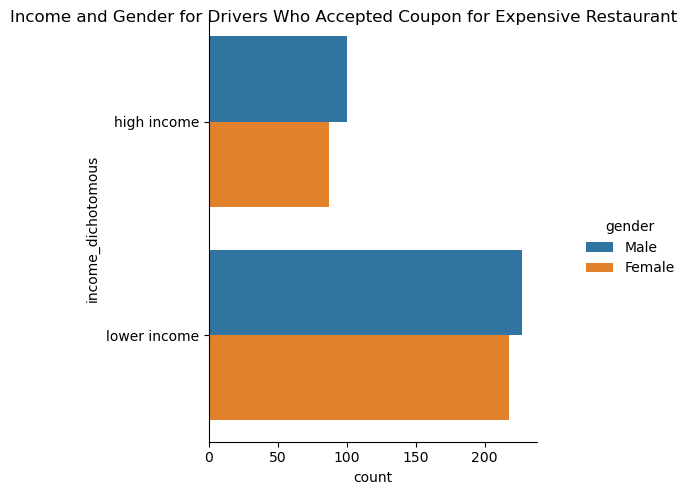

In [445]:
# plot income and gender for drivers who accepted more expensive restaurant coupon

# new column to represent high and low income dichotomy
data_ver3_coupon_Restaurant2050['income_dichotomous'] = 'None'  # create 'income_dichotomous' column with 'None' as the default value

# Set values for income_dichotomous
data_ver3_coupon_Restaurant2050.loc[data_ver3_coupon_Restaurant2050['income'] == 'Less than $12500', 'income_dichotomous'] = 'lower income'
data_ver3_coupon_Restaurant2050.loc[data_ver3_coupon_Restaurant2050['income'] == '$12500 - $24999', 'income_dichotomous'] = 'lower income'
data_ver3_coupon_Restaurant2050.loc[data_ver3_coupon_Restaurant2050['income'] == '$25000 - $37499', 'income_dichotomous'] = 'lower income'
data_ver3_coupon_Restaurant2050.loc[data_ver3_coupon_Restaurant2050['income'] == '$37500 - $49999', 'income_dichotomous'] = 'lower income'
data_ver3_coupon_Restaurant2050.loc[data_ver3_coupon_Restaurant2050['income'] == '$50000 - $62499', 'income_dichotomous'] = 'lower income'
data_ver3_coupon_Restaurant2050.loc[data_ver3_coupon_Restaurant2050['income'] == '$62500 - $74999', 'income_dichotomous'] = 'lower income'
data_ver3_coupon_Restaurant2050.loc[data_ver3_coupon_Restaurant2050['income'] == '$75000 - $87499', 'income_dichotomous'] = 'high income'
data_ver3_coupon_Restaurant2050.loc[data_ver3_coupon_Restaurant2050['income'] == '$87500 - $99999', 'income_dichotomous'] = 'high income'
data_ver3_coupon_Restaurant2050.loc[data_ver3_coupon_Restaurant2050['income'] == '$100000 or More', 'income_dichotomous'] = 'high income'
# data_ver3_coupon_Restaurant2050.tail()

# filter data to only include drivers who accepted the more expensive restaurant coupon
data_ver3_coupon_Restaurant2050_acceptcoupon = data_ver3_coupon_Restaurant2050[(data_ver3_coupon_Restaurant2050["Y"] == 1)]
# data_ver3_coupon_Restaurant2050_acceptcoupon.tail()

catplot_expensiveresto_income_gender = sns.catplot(data = data_ver3_coupon_Restaurant2050_acceptcoupon, y = "income_dichotomous", hue="gender", kind="count")
catplot_expensiveresto_income_gender.fig.suptitle("Income and Gender for Drivers Who Accepted Coupon for Expensive Restaurant")
plt.savefig("images/catplot_expensiveresto_income_gender", bbox_inches='tight', dpi=300)

In [446]:
# Analysis for drivers with low income who accepted a coupon for an expensive restaurant

data_ver3_coupon_Restaurant2050_lowincome = data_ver3_coupon_Restaurant2050.query('income_dichotomous == "lower income"')
data_ver3_coupon_Restaurant2050_lowincome.tail()

count_Y1_lowincome = data_ver3_coupon_Restaurant2050_lowincome['Y'].value_counts()[1]
total_count_Y_lowincome = data_ver3_coupon_Restaurant2050_lowincome['Y'].count()
Y1_proportion_of_Y_lowincome = (count_Y1_lowincome / total_count_Y_lowincome)
print(f"Proportion of expensive restaurant coupons accepted by people who had lower income: {Y1_proportion_of_Y_lowincome}")




Proportion of expensive restaurant coupons accepted by people who had lower income: 0.4388560157790927


In [447]:
data_ver3_coupon_only['maritalStatus'].value_counts()

maritalStatus
Married partner      833
Single               638
Unmarried partner    352
Divorced              73
Widowed               17
Name: count, dtype: int64